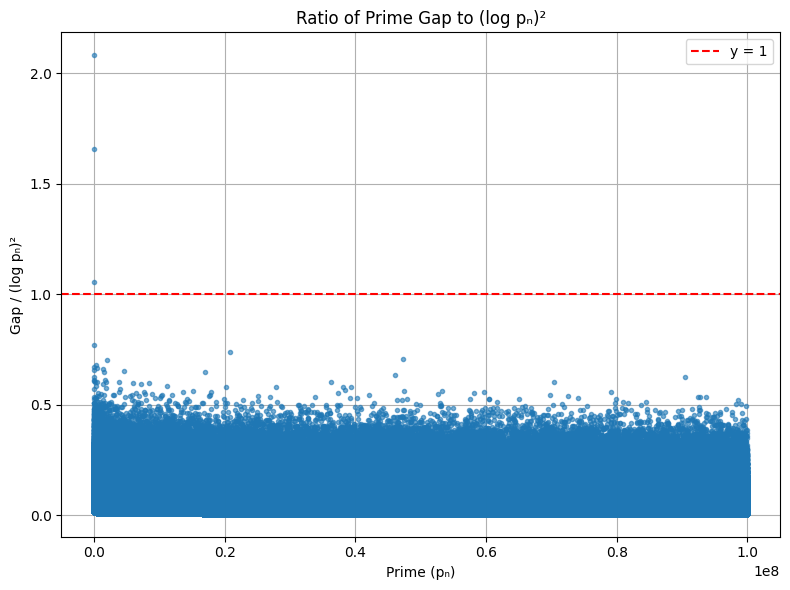

In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd

primes = []
a = []
b = []
n = 100_000_000

# for x in range(2, n):
#     for y in range(2, int(x**(1/2) + 1)):
#         if x % y == 0:
#             break
#     else:
#         primes.append(x)

from sympy import primerange
primes = list(primerange(2, n))


prime_nums = primes[:-1]
next_primes = primes[1:]
prime_gaps = [next_primes[i] - prime_nums[i] for i in range(len(prime_nums))]
log_sq = [math.log(p) ** 2 for p in prime_nums]
ratios = [prime_gaps[i] / log_sq[i] for i in range(len(prime_nums))]

df = pd.DataFrame({
    'Prime': prime_nums,
    'Next Prime': next_primes,
    'Prime Gap': prime_gaps,
    '(log p)^2': log_sq,
    'Gap / (log p)^2': ratios
})

# df.to_csv("Cramer.csv", index=False)

plt.figure(figsize=(8,6))
plt.plot(df['Prime'], df['Gap / (log p)^2'], '.', alpha=0.6)
plt.axhline(y=1, color='r', linestyle='--', label='y = 1')
plt.xlabel("Prime (pₙ)")
plt.ylabel("Gap / (log pₙ)²")
plt.title("Ratio of Prime Gap to (log pₙ)²")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

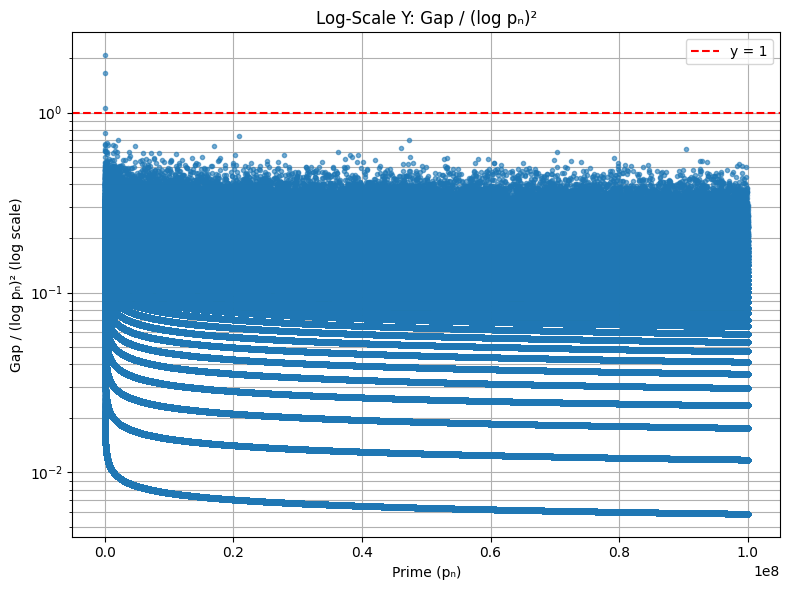

In [ ]:
# y only
plt.figure(figsize=(8,6))
plt.plot(df['Prime'], df['Gap / (log p)^2'], '.', alpha=0.6)
plt.axhline(y=1, color='r', linestyle='--', label='y = 1')
plt.xscale("linear")
plt.yscale("log")
plt.xlabel("Prime (pₙ)")
plt.ylabel("Gap / (log pₙ)² (log scale)")
plt.title("Log-Scale Y: Gap / (log pₙ)²")
plt.legend()
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

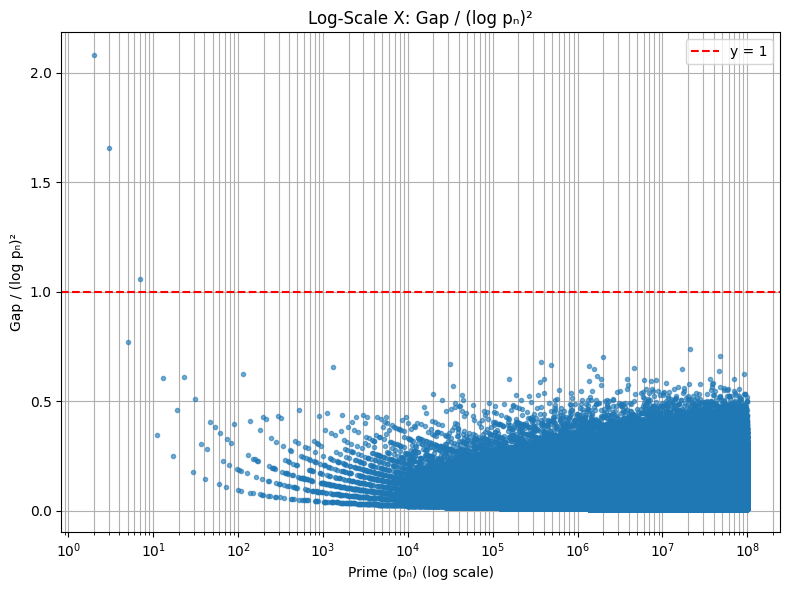

In [ ]:
#x log

plt.figure(figsize=(8,6))
plt.plot(df['Prime'], df['Gap / (log p)^2'], '.', alpha=0.6)
plt.axhline(y=1, color='r', linestyle='--', label='y = 1')
plt.xscale("log")
plt.yscale("linear")
plt.xlabel("Prime (pₙ) (log scale)")
plt.ylabel("Gap / (log pₙ)²")
plt.title("Log-Scale X: Gap / (log pₙ)²")
plt.legend()
plt.grid(True, which='both')
plt.tight_layout()
plt.show()


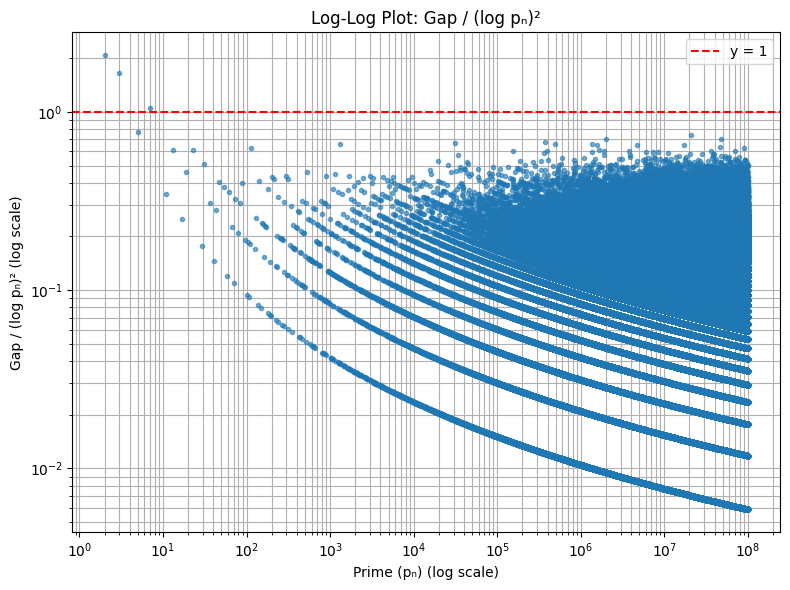

In [ ]:
# log -log

plt.figure(figsize=(8,6))
plt.plot(df['Prime'], df['Gap / (log p)^2'], '.', alpha=0.6)
plt.axhline(y=1, color='r', linestyle='--', label='y = 1')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Prime (pₙ) (log scale)")
plt.ylabel("Gap / (log pₙ)² (log scale)")
plt.title("Log-Log Plot: Gap / (log pₙ)²")
plt.legend()
plt.grid(True, which='both')
plt.tight_layout()
plt.show()


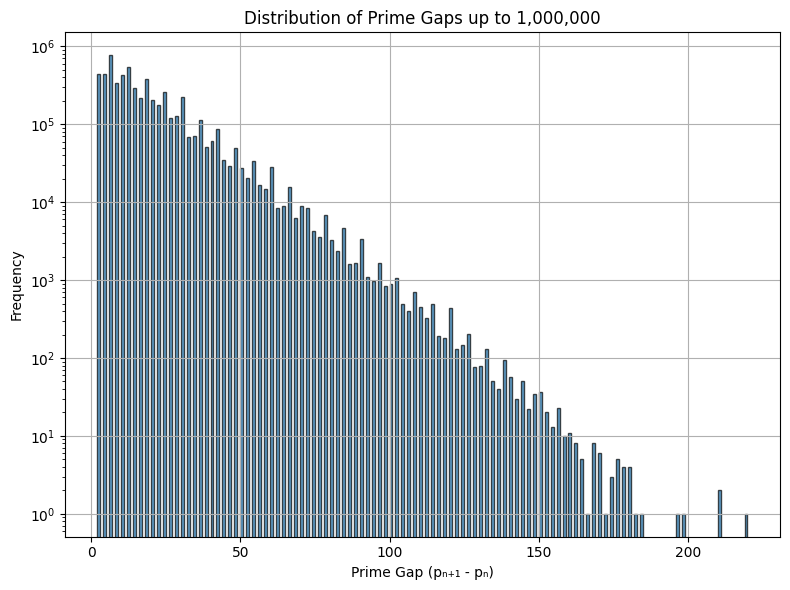

In [ ]:
#prime gaps

plt.figure(figsize=(8,6))
plt.hist(df['Prime Gap'], bins=range(2, max(df['Prime Gap']) + 1), edgecolor='black', alpha=0.7)
plt.yscale("log")
plt.xlabel("Prime Gap (pₙ₊₁ - pₙ)")
plt.ylabel("Frequency")
plt.title("Distribution of Prime Gaps up to 1,000,000")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3780084657.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


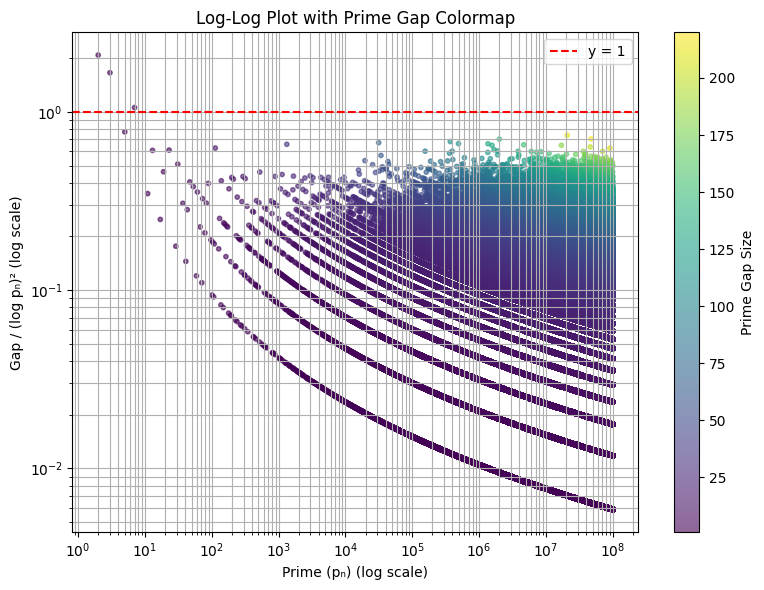

In [ ]:
#Log-Log Scatter with Colormap by Prime Gap Size

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    df['Prime'],
    df['Gap / (log p)^2'],
    c=df['Prime Gap'],
    cmap='viridis',  # Options: 'plasma', 'cividis', 'inferno', etc.
    alpha=0.6,
    s=10  # point size
)
plt.axhline(y=1, color='r', linestyle='--', label='y = 1')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Prime (pₙ) (log scale)")
plt.ylabel("Gap / (log pₙ)² (log scale)")

# plt.xlim(100_000, 200_000)      # Zoom in on X-axis
# plt.ylim(0.1, 10)              # Zoom in on Y-axis (adjust as needed)

plt.title("Log-Log Plot with Prime Gap Colormap")
plt.colorbar(scatter, label='Prime Gap Size')
plt.grid(True, which='both')
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-3568884694.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


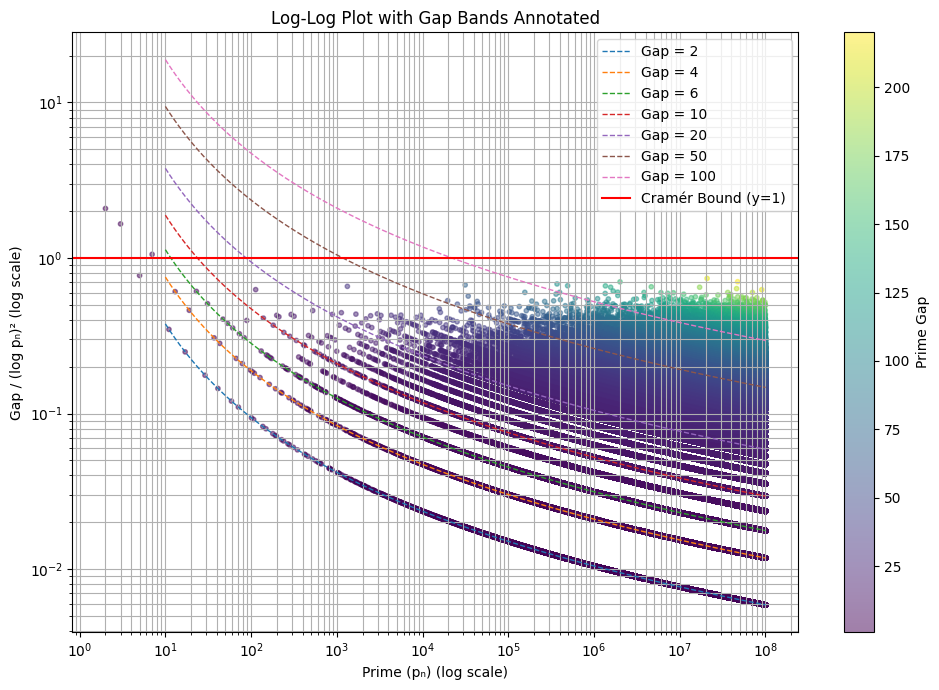

In [ ]:
import numpy as np

x_vals = np.logspace(1, 8, 500)  # 10 to 100 million on log scale
gap_values = [2, 4, 6, 10, 20, 50, 100]

plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    df['Prime'],
    df['Gap / (log p)^2'],
    c=df['Prime Gap'],
    cmap='viridis',
    s=10, alpha=0.5
)

# Plot each gap-band curve
for g in gap_values:
    y_vals = [g / (math.log(x)**2) for x in x_vals]
    plt.plot(x_vals, y_vals, linestyle='--', linewidth=1, label=f'Gap = {g}')

plt.axhline(y=1, color='red', linestyle='-', label='Cramér Bound (y=1)')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Prime (pₙ) (log scale)")
plt.ylabel("Gap / (log pₙ)² (log scale)")
plt.title("Log-Log Plot with Gap Bands Annotated")
plt.colorbar(scatter, label='Prime Gap')
plt.legend()
plt.grid(True, which='both')
plt.tight_layout()
plt.show()


/tmp/ipython-input-896926052.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


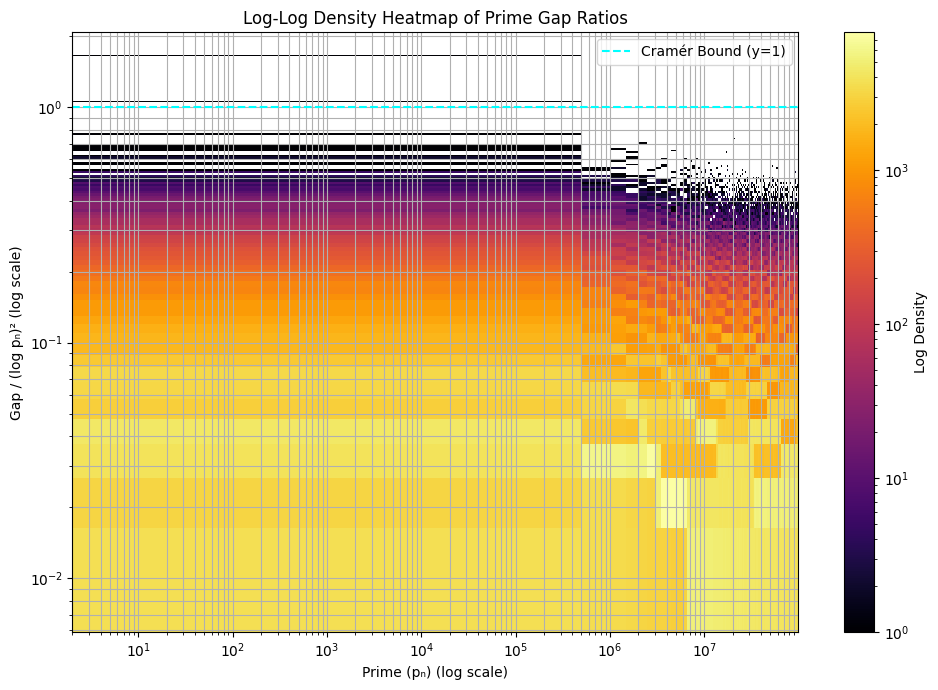

In [ ]:
plt.figure(figsize=(10, 7))
plt.hist2d(
    df['Prime'],
    df['Gap / (log p)^2'],
    bins=[200, 200],
    norm='log',  # log color scale
    cmap='inferno'
)
plt.colorbar(label='Log Density')
plt.axhline(y=1, color='cyan', linestyle='--', label='Cramér Bound (y=1)')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Prime (pₙ) (log scale)")
plt.ylabel("Gap / (log pₙ)² (log scale)")
plt.title("Log-Log Density Heatmap of Prime Gap Ratios")
plt.legend()
plt.grid(True, which='both')
plt.tight_layout()
plt.show()


/tmp/ipython-input-4010804368.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


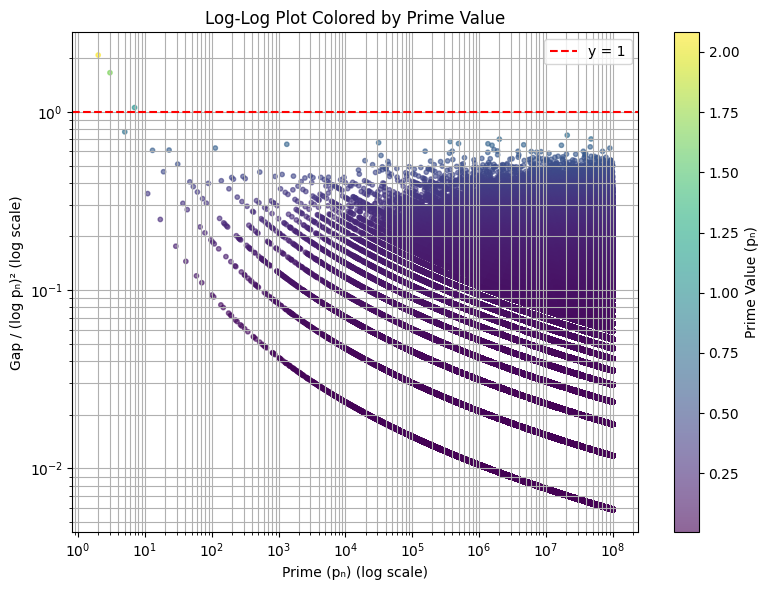

In [ ]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    df['Prime'],
    df['Gap / (log p)^2'],
    c=df['Gap / (log p)^2'],          # <-- Color by prime value
    cmap='viridis',
    alpha=0.6,
    s=10
)
plt.axhline(y=1, color='r', linestyle='--', label='y = 1')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Prime (pₙ) (log scale)")
plt.ylabel("Gap / (log pₙ)² (log scale)")
plt.title("Log-Log Plot Colored by Prime Value")
plt.colorbar(scatter, label='Prime Value (pₙ)')
plt.grid(True, which='both')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
num_violations = sum(df['Gap / (log p)^2'] > 1)
total_points = len(df)
violation_rate = num_violations / total_points
violation_rate

5.2070189226539e-07

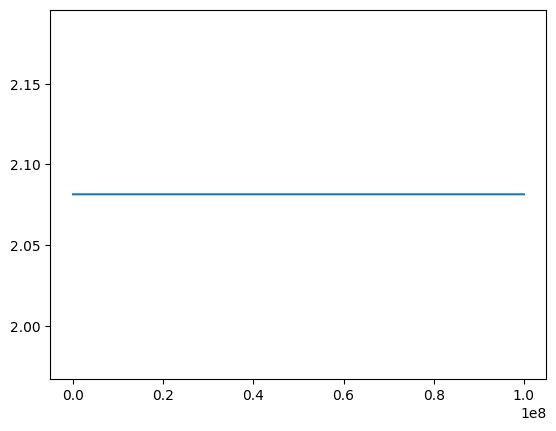

In [ ]:
import numpy as np
df['Rolling Max'] = np.maximum.accumulate(df['Gap / (log p)^2'])
plt.plot(df['Prime'], df['Rolling Max'])


In [ ]:
df[df['Gap / (log p)^2'] > 1.2].head(10)  # investigate specific cases


,Prime,Next Prime,Prime Gap,(log p)^2,Gap / (log p)^2,Rolling Max
0,2,3,1,0.480453,2.081369,2.081369
1,3,5,2,1.206949,1.657071,2.081369


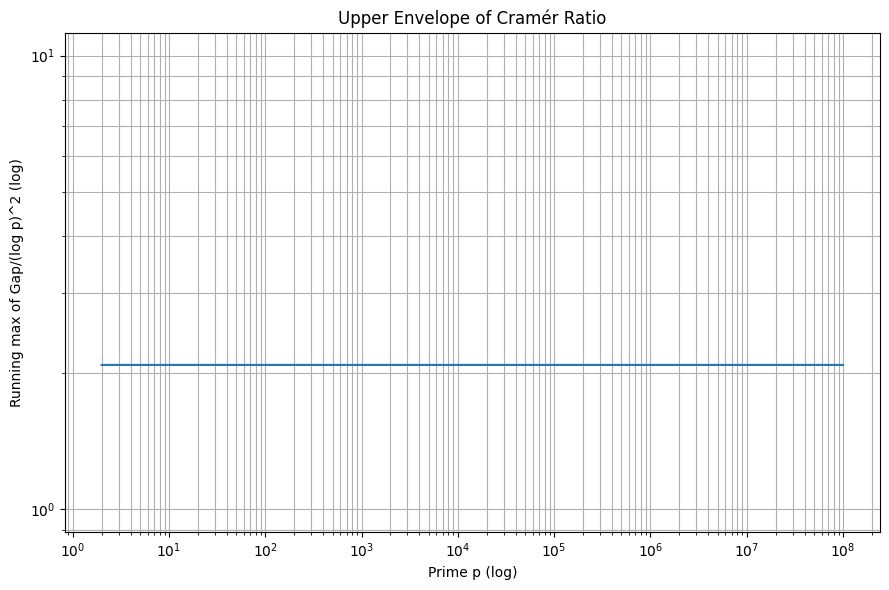

In [ ]:
# Running maximum of the Cramér ratio

import numpy as np
import matplotlib.pyplot as plt

p = df['Prime'].to_numpy()
ratio = df['Gap / (log p)^2'].to_numpy()

running_max = np.maximum.accumulate(ratio)

plt.figure(figsize=(9,6))
plt.plot(p, running_max)
plt.xscale("log"); plt.yscale("log")
plt.xlabel("Prime p (log)"); plt.ylabel("Running max of Gap/(log p)^2 (log)")
plt.title("Upper Envelope of Cramér Ratio")
plt.grid(True, which='both')
plt.tight_layout(); plt.show()


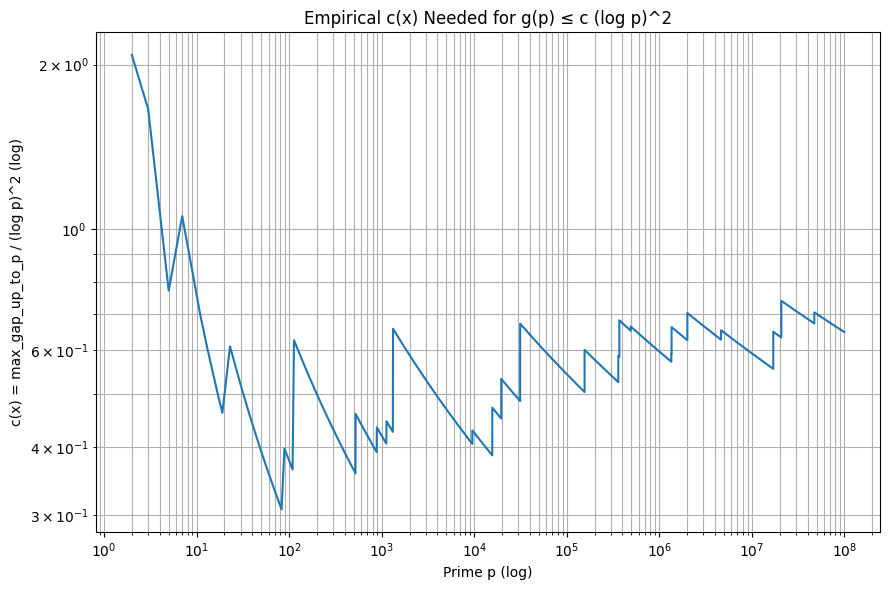

In [ ]:
# How large must c be?


gap = df['Prime Gap'].to_numpy()
cum_max_gap = np.maximum.accumulate(gap)
c_of_x = cum_max_gap / (np.log(p)**2)

plt.figure(figsize=(9,6))
plt.plot(p, c_of_x)
plt.xscale("log"); plt.yscale("log")
plt.xlabel("Prime p (log)"); plt.ylabel("c(x) = max_gap_up_to_p / (log p)^2 (log)")
plt.title("Empirical c(x) Needed for g(p) ≤ c (log p)^2")
plt.grid(True, which='both')
plt.tight_layout(); plt.show()


/tmp/ipython-input-1669668435.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = {t: df_b.groupby('bin')['Gap / (log p)^2'].apply(lambda s: (s>t).mean()) for t in thresholds}


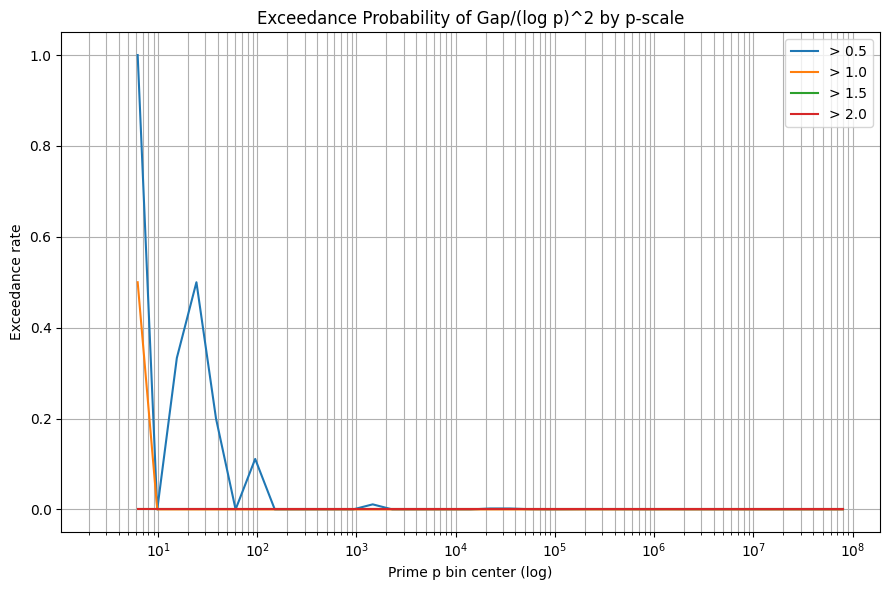

In [ ]:
import pandas as pd

edges = np.logspace(np.log10(p.min()), np.log10(p.max()), 40)
bins = pd.cut(p, edges, include_lowest=True)
df_b = df.assign(bin=bins)

thresholds = [0.5, 1.0, 1.5, 2.0]
rates = {t: df_b.groupby('bin')['Gap / (log p)^2'].apply(lambda s: (s>t).mean()) for t in thresholds}
centers = np.sqrt(edges[:-1]*edges[1:])

plt.figure(figsize=(9,6))
for t in thresholds:
    plt.plot(centers, rates[t].to_numpy(), label=f'> {t}')
plt.xscale("log")
plt.xlabel("Prime p bin center (log)"); plt.ylabel("Exceedance rate")
plt.title("Exceedance Probability of Gap/(log p)^2 by p‑scale")
plt.grid(True, which='both'); plt.legend(); plt.tight_layout(); plt.show()


/tmp/ipython-input-1928697774.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  qstats = df_b.groupby('bin')['Gap / (log p)^2'].quantile(Qs).unstack()


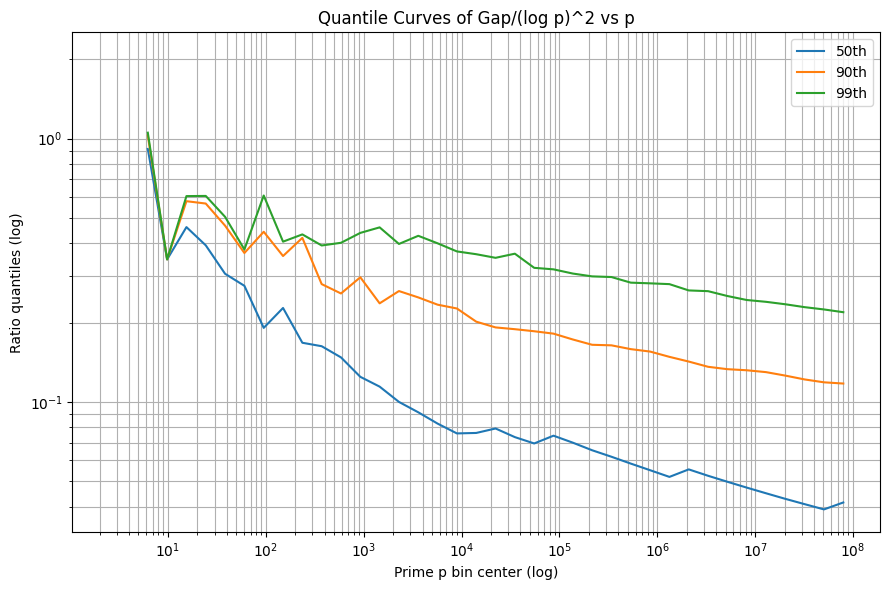

In [ ]:
# Quantile bands of the ratio across p

Qs = [0.5, 0.9, 0.99]
qstats = df_b.groupby('bin')['Gap / (log p)^2'].quantile(Qs).unstack()
med = qstats[0.5].to_numpy(); q90 = qstats[0.9].to_numpy(); q99 = qstats[0.99].to_numpy()

plt.figure(figsize=(9,6))
plt.plot(centers, med, label='50th')
plt.plot(centers, q90, label='90th')
plt.plot(centers, q99, label='99th')
plt.xscale("log"); plt.yscale("log")
plt.xlabel("Prime p bin center (log)"); plt.ylabel("Ratio quantiles (log)")
plt.title("Quantile Curves of Gap/(log p)^2 vs p")
plt.grid(True, which='both'); plt.legend(); plt.tight_layout(); plt.show()


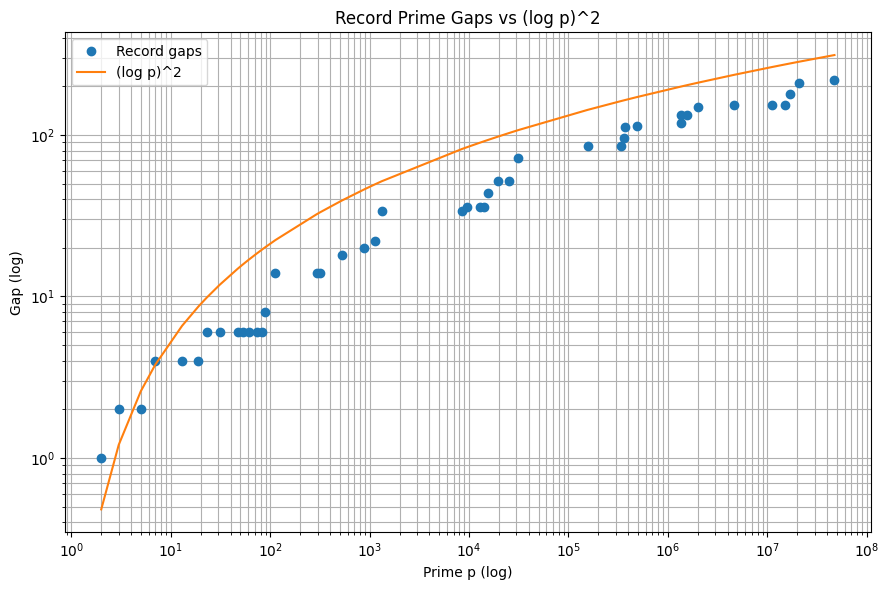

In [ ]:
is_record = gap == cum_max_gap
p_rec = p[is_record]; g_rec = gap[is_record]
ref = (np.log(p_rec)**2)

plt.figure(figsize=(9,6))
plt.plot(p_rec, g_rec, marker='o', linestyle='none', label='Record gaps')
plt.plot(p_rec, ref, label='(log p)^2')
plt.xscale("log"); plt.yscale("log")
plt.xlabel("Prime p (log)"); plt.ylabel("Gap (log)")
plt.title("Record Prime Gaps vs (log p)^2")
plt.grid(True, which='both'); plt.legend(); plt.tight_layout(); plt.show()


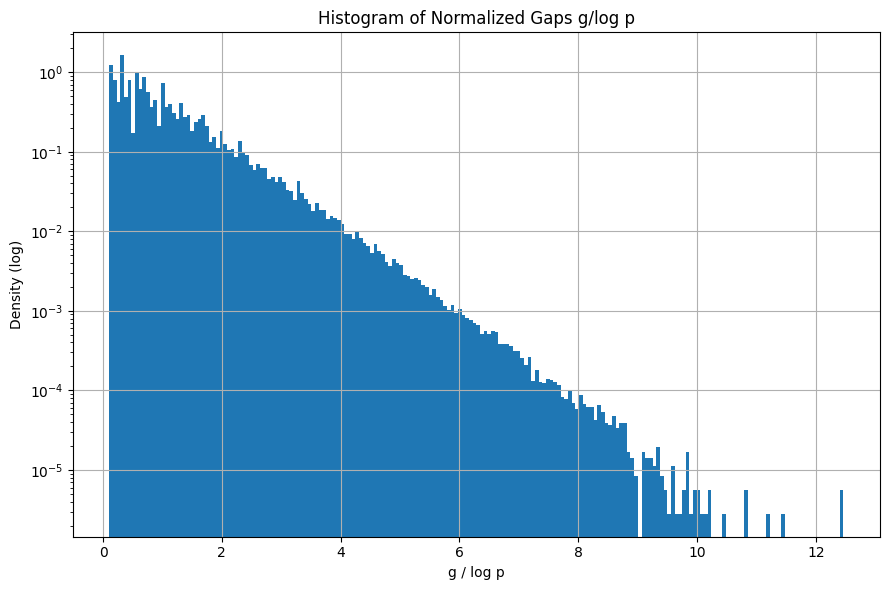

In [ ]:
g_over_logp = gap / np.log(p)

plt.figure(figsize=(9,6))
plt.hist(g_over_logp, bins=200, density=True)
plt.xscale("linear"); plt.yscale("log")
plt.xlabel("g / log p"); plt.ylabel("Density (log)")
plt.title("Histogram of Normalized Gaps g/log p")
plt.grid(True); plt.tight_layout(); plt.show()

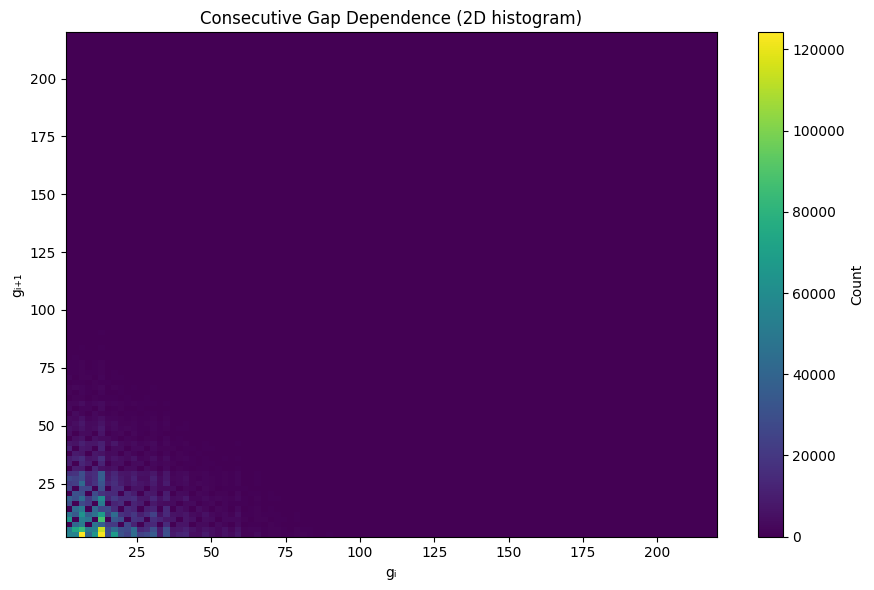

Corr(g_i, g_{i+1}) = -0.03160655810053326


In [ ]:
# Consecutive‑gap dependence

g_i = gap[:-1]; g_next = gap[1:]

plt.figure(figsize=(9,6))
plt.hist2d(g_i, g_next, bins=[100,100])
plt.colorbar(label='Count')
plt.xlabel("gᵢ"); plt.ylabel("gᵢ₊₁")
plt.title("Consecutive Gap Dependence (2D histogram)")
plt.tight_layout(); plt.show()

# Optional: correlation
corr = np.corrcoef(g_i, g_next)[0,1]
print("Corr(g_i, g_{i+1}) =", corr)


Median ratio by residue mod 6:
 res
1    0.042924
5    0.042777
Name: ratio, dtype: float64


/tmp/ipython-input-3107600731.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([res_ratio[res_ratio['res']==1]['ratio'], res_ratio[res_ratio['res']==5]['ratio']], labels=['1 mod 6','5 mod 6'])


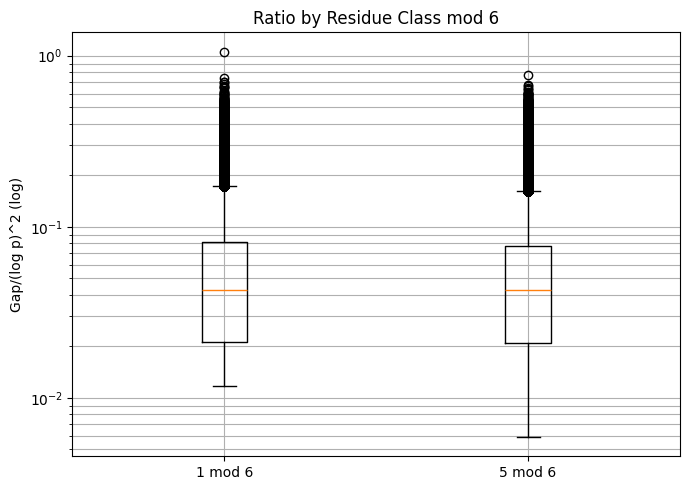

In [ ]:
# Any systematic differences by residue class?

res = (p % 6)
mask = (p > 3) & ((res==1) | (res==5))
res_ratio = pd.DataFrame({'res': res[mask], 'ratio': ratio[mask]})

grp = res_ratio.groupby('res')['ratio'].median()
print("Median ratio by residue mod 6:\n", grp)

# Visual (boxplot)
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.boxplot([res_ratio[res_ratio['res']==1]['ratio'], res_ratio[res_ratio['res']==5]['ratio']], labels=['1 mod 6','5 mod 6'])
plt.yscale("log"); plt.ylabel("Gap/(log p)^2 (log)")
plt.title("Ratio by Residue Class mod 6")
plt.grid(True, which='both'); plt.tight_layout(); plt.show()


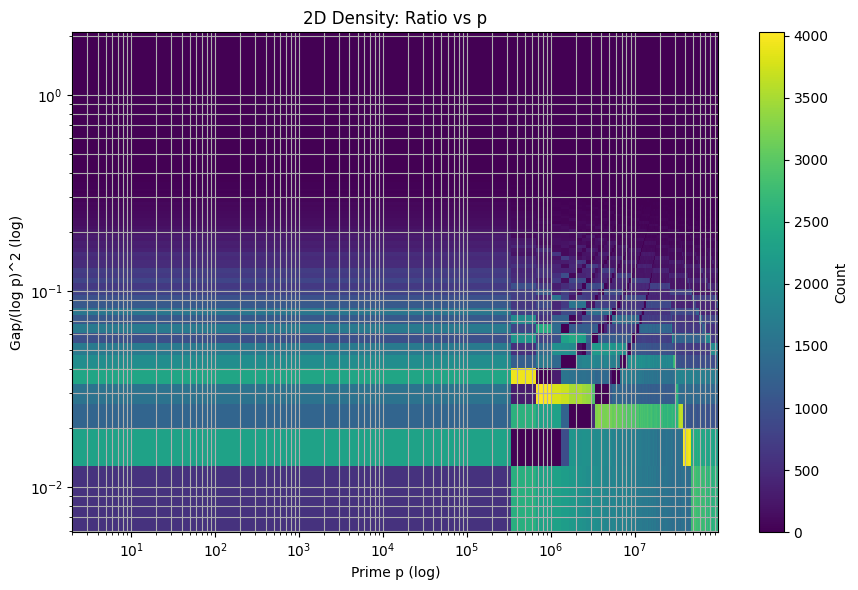

In [ ]:
# Density heatmap (log‑log axes)—final synthesis

plt.figure(figsize=(9,6))
plt.hist2d(p, ratio, bins=[300,300], norm=None)
plt.xscale("log"); plt.yscale("log")
plt.xlabel("Prime p (log)"); plt.ylabel("Gap/(log p)^2 (log)")
plt.title("2D Density: Ratio vs p")
plt.colorbar(label='Count')
plt.grid(True, which='both'); plt.tight_layout(); plt.show()